# Import Packages & Data

In [69]:
import numpy as np               # NumPy
import pandas as pd              # Pandas
import re                        # Re?
from datetime import datetime    # Calculates Processing Time
import random

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import cohen_kappa_score
from customUtils import limits

from skll.metrics import kappa
from bhkappa import mean_quadratic_weighted_kappa

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
plt.rcParams['figure.dpi']= 100
plt.style.use('ggplot')

np.warnings.filterwarnings('ignore') 

In [70]:
# Import Pre-processed Data
training_set = pd.read_pickle('preprocessedSupervised.pkl')

# Select features
predictors = [  
    # 'essay_id',
    # 'topic',
    # 'essay',
    # 'target_score',
    # 'rater1_domain1',
    # 'rater2_domain1',

    'subjectivity',
    'polarity',
    # 'matches',
    'corrections',
    # 'corrected',
    # 'tokens',
    # 'lemma',
    # 'pos',
    # 'sents',
    'ner',
    'word_count',
    'char_count',
    'token_count',
    'unique_token_count',
    'nostop_count',
    'sent_count',
    'ner_unredacted_count',
    'comma',
    'question',
    'exclamation',
    'quotation',
    'organization',
    'caps',
    'person',
    'location',
    'money',
    'time',
    'date',
    'percent',
    'noun',
    'adj',
    'pron',
    'verb',
    'cconj',
    'adv',
    'det',
    'propn',
    'num',
    'part',
    'intj',
    'flesch',
    'smog',
    'kincaid',
    'coleman_liau',
    'readability',
    'dale_chall',
    'difficult_words',
    'linsear',
    'gunning_fog',
    # 'grade_level',
    'wc_ratio',
    'sw_ratio',
    'ners_ratio',
    'TTR',
    'dw_ratio',
    'h_similarity',
    'm_similarity',
    # 'l_essay',
]

# Regression Pipeline

In [96]:
def evaluate(df, topic, features, model):
    """Regression pipeline; Returns QWK Score"""
    X = df[df['topic'] == topic][features]
    y = df[df['topic'] == topic]['target_score'].astype(np.float64)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
    
    pipeline = Pipeline(model)
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    return kappa(y_pred, y_test, weights='quadratic')

In [100]:
# Supervised Pipeline
models = [
    [('scaler', StandardScaler()),('linearSVC', LinearSVC(C=0.01))],
    [('scaler', StandardScaler()),('lm', LinearRegression())], 
    [('rf', RandomForestRegressor())],  
    [('en', ElasticNet(l1_ratio=0.01, alpha=0.1, max_iter=100000))],
    [('bag', BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5))]
]

for steps in models:
    kappas = []
    weights = []
    for topic in range(1,9):
        kappas.append(evaluate(training_set, topic, predictors, steps))
        weights.append(len(training_set[training_set.topic==topic]))

    print('Model: %s' % steps[0][0])
    for k in kappas:
        print(k)

Model: scaler
0.6561547450743244
0.5761198329252485
0.682097141855164
0.6136175616137908
0.712212389380531
0.5582000743770917
0.578059003266466
0.4492578728264248
Model: scaler
0.8285367934270192
0.6706875753920386
0.5954983922829582
0.7098144465254581
0.7906613968906322
0.6444966371303513
0.7534188882429338
0.7842001961311773
Model: rf
0.8574607843137255
0.5923344947735192
0.6174505738715668
0.6889361018371392
0.8002289540097305
0.6824678849285326
0.7184662117788047
0.6934998184704535
Model: en
0.8237390053699327
0.6819649245266557
0.6236497230904207
0.7271953248964744
0.7768923683924382
0.653145622525297
0.7578931057881885
0.6860076135111551
Model: bag
0.7549238986608658
0.6178580262181548
0.7346908182386009
0.724478151717842
0.7492655055432014
0.6910211267605634
0.6248908519755432
0.5013383607654394


In [99]:
# Supervised Pipeline 5 Fold
models = [
    [('scaler', StandardScaler()),('linearSVC', LinearSVC(C=0.01))],
    [('scaler', StandardScaler()),('lm', LinearRegression())], 
    [('rf', RandomForestRegressor())],  
    [('en', ElasticNet(l1_ratio=0.01, alpha=0.1, max_iter=100000))],
    [('bag', BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5))]
]

for steps in models:
    results = open("models/%s_Results.txt" % steps[0][0], "w+")
    print('Model: %s' % steps[0][0])
    for fold in range(5):
        fold = str(fold+1)
        print("Fold: %s" % fold) 
        for topic in range(1,9):
            score = evaluate(training_set, topic, predictors, steps)
            results.write("%s \n" % score)
        results.write("\n")

Model: scaler
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Model: scaler
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Model: rf
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Model: en
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5
Model: bag
Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5


In [68]:
# Ensemble Method (doesn't work with the Pipeline Method)
kappas = []
weights = []

def voting(df, topic, features, model):
    """Regression pipeline; Returns QWK Score"""
    X = df[df['topic'] == topic][features]
    y = df[df['topic'] == topic]['target_score'].astype(np.float64)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=26)
    model.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    return kappa(y_pred, y_test, weights='quadratic')

eclf = VotingClassifier(estimators=models)
for topic in range(1,9):
    kappas.append(voting(training_set, topic, predictors, eclf))
    weights.append(len(training_set[training_set.topic==topic]))
    
mqwk = mean_quadratic_weighted_kappa(kappas, weights=weights)
print('Model: %s' % steps[0][0])
i=1
for k in kappas:
    print('Prompt: {:.4f} | QWK: {:,.2f}'.format(i, k))
    i = i+1
print('Weighted Mean: {:.4f}'.format(mqwk))

ValueError: not enough values to unpack (expected 2, got 1)

In [17]:
# Quick Pipeline for GridSearchCV
def en_evaluate(df, topic, features):
    paramgrid = {'l1_ratio': [.01, .1, .3, .5, .7, .99], 'alpha': [0.001, 0.01, 0.1, 1]}
    X = df[df['topic'] == topic][features]
    y = df[df['topic'] == topic]['target_score'].astype(np.float64)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)
    
    gs = GridSearchCV(ElasticNet(max_iter=100000, random_state=26),
                      param_grid=paramgrid,
                      cv=5)
    gs.fit(X_train, y_train)
    print('Topic', topic, 'best parameters:', gs.best_params_)
    y_pred = gs.predict(X_test)

    return kappa(y_pred, y_test, weights='quadratic')

In [18]:
kappas = []
weights = []
for topic in range(1,9):
    kappas.append(en_evaluate(training_set, topic, predictors))
    weights.append(len(training_set[training_set.topic==topic]))
mqwk = mean_quadratic_weighted_kappa(kappas, weights=weights)
print('Weighted by topic Kappa score: {:.4f}'.format(mqwk))

Topic 1 best parameters: {'alpha': 0.001, 'l1_ratio': 0.99}


KeyboardInterrupt: 

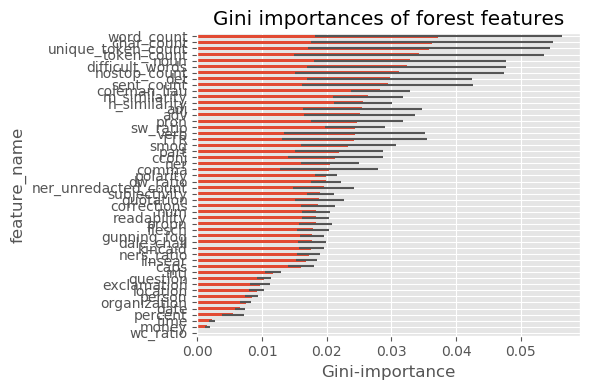

In [19]:
X = training_set[predictors]
y = training_set['target_score'].astype(np.float64)

forest = ExtraTreesClassifier(n_estimators=250, random_state=26)
forest.fit(X, y)
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# plot feature importances
features = pd.DataFrame({'feature_name': X.columns, 'importance': forest.feature_importances_, 'std': std})
features.sort_values('importance')\
        .plot.barh(x='feature_name', y='importance', xerr='std', legend=False)
plt.title('Gini importances of forest features')
plt.xlabel('Gini-importance')
plt.tight_layout()
plt.show()

In [40]:
# Linear Regression w/ k Best Features
k = 15
top_features = features.sort_values('importance', ascending=False)['feature_name'].tolist()[:k]

# Linear regression with top k features
kappas = []
weights = []
steps = [('scaler', StandardScaler()),('lm', LinearRegression())]
for topic in range(1,9):
    kappas.append(evaluate(training_set, topic, top_features, steps))
    weights.append(len(training_set[training_set.topic==topic]))
i=1
for k in kappas:
    print('Prompt: {:.4f} | QWK: {:,.2f}'.format(i, k))
    i = i+1

mqwk = mean_quadratic_weighted_kappa(kappas, weights=weights)
print('Weighted Mean: {:.4f}'.format(mqwk))

Prompt: 1.0000 | QWK: 0.79
Prompt: 2.0000 | QWK: 0.64
Prompt: 3.0000 | QWK: 0.62
Prompt: 4.0000 | QWK: 0.63
Prompt: 5.0000 | QWK: 0.81
Prompt: 6.0000 | QWK: 0.65
Prompt: 7.0000 | QWK: 0.71
Prompt: 8.0000 | QWK: 0.59
Weighted Mean: 0.6950
